In [1]:
import pandas as pd
traindf=pd.read_csv("train.csv",encoding="utf-8") #匯入訓練資料集
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
testdf=pd.read_csv("test.csv",encoding="utf-8")#匯入測試資料集
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
traindf.isna().sum() #找缺失值

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#填入數值類缺失值(中位數)
med=traindf.median()
traindf=traindf.fillna(med)
testdf=testdf.fillna(med)
print("訓練:",traindf.isna().sum())
print("測試:",testdf.isna().sum())

訓練: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
測試: PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [5]:
#填補種類缺失值(最常出現)
most=traindf["Embarked"].value_counts().idxmax()
traindf["Embarked"]=traindf["Embarked"].fillna(most)
testdf["Embarked"]=testdf["Embarked"].fillna(most)
print("訓練:",traindf.isna().sum())
print("測試:",testdf.isna().sum())

訓練: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
測試: PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [6]:
#特徵值表達轉換(無大小關係之文字)(one hot encoding)
dummy=pd.get_dummies(traindf["Embarked"])#轉換後表格
traindf=pd.concat([traindf,dummy],axis=1)  #表格合併,(axis=1橫向,axis=0縱向) 
dummy=pd.get_dummies(testdf["Embarked"])
testdf=pd.concat([testdf,dummy],axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [7]:
dummy=pd.get_dummies(traindf["Sex"])
traindf=pd.concat([traindf,dummy],axis=1)  #表格合併,(axis=1橫向,axis=0縱向) 
dummy=pd.get_dummies(testdf["Sex"])
testdf=pd.concat([testdf,dummy],axis=1)

In [8]:
#name處理
def nameflow(s): #取出稱謂
    mid=s.split(",")[1].split(".")[0].replace(" ","")
    return mid
name=traindf["Name"].apply(nameflow)
pd.crosstab(name,traindf["Survived"]).T #找出資料特殊值

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [9]:
def nameflow(s): #取出稱謂，姓名資料清理
    mid=s.split(",")[1].split(".")[0].replace(" ","")
    if mid=="Miss": return "Miss"
    elif mid=="Mr": return "Mr"
    elif mid=="Mrs": return "Mrs"
    else: return "throw"
name=traindf["Name"].apply(nameflow)
dummy=pd.get_dummies(name)
traindf=pd.concat([traindf,dummy],axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,C,Q,S,female,male,Miss,Mr,Mrs,throw
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,1,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,0,0,1,0,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,0,0,1,1,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,S,0,0,1,1,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,1,0,0,0,1,0,1,0,0


In [10]:
name=testdf["Name"].apply(nameflow)
dummy=pd.get_dummies(name)
testdf=pd.concat([testdf,dummy],axis=1)

In [11]:
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'Q', 'S', 'female',
       'male', 'Miss', 'Mr', 'Mrs', 'throw'],
      dtype='object')

In [12]:
#資料清理
traindf=traindf.drop(['PassengerId','Name', 'Sex','Ticket', 'Cabin', 'Embarked','throw'],axis=1)
testdf=testdf.drop(['Name', 'Sex','Ticket', 'Cabin', 'Embarked','throw'],axis=1)
traindf

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,1,0,0,0
887,1,1,19.0,0,0,30.0000,0,0,1,1,0,1,0,0
888,0,3,28.0,1,2,23.4500,0,0,1,1,0,1,0,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,1,0,1,0


In [13]:
testdf

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,28.0,0,0,8.0500,0,0,1,0,1,0,1,0
414,1306,1,39.0,0,0,108.9000,1,0,0,1,0,0,0,0
415,1307,3,38.5,0,0,7.2500,0,0,1,0,1,0,1,0
416,1308,3,28.0,0,0,8.0500,0,0,1,0,1,0,1,0


<AxesSubplot:>

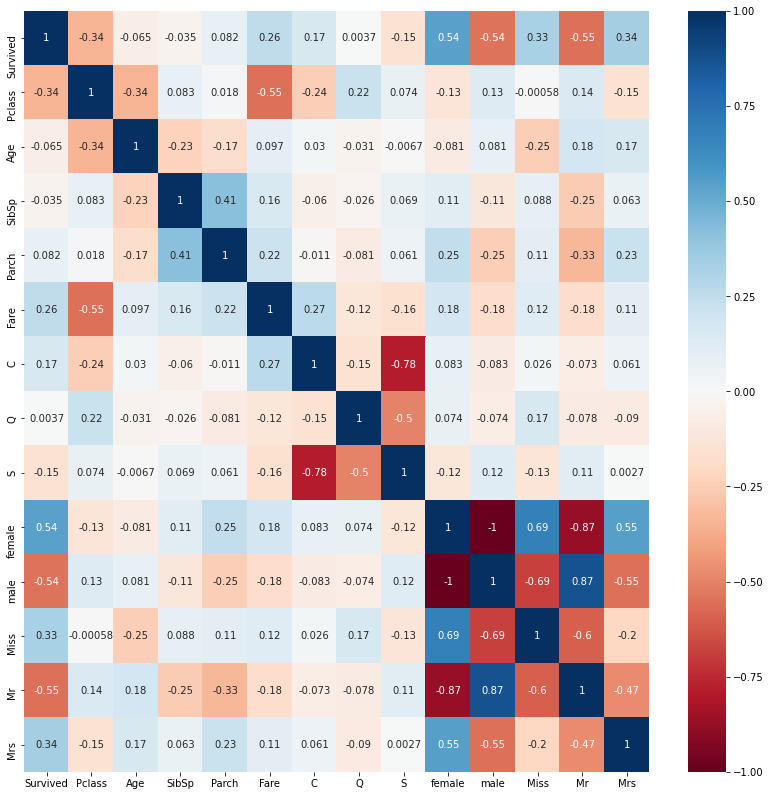

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(14,14))
sns.heatmap(traindf.corr(),annot=True,cmap="RdBu")#corr=相關係數

In [15]:
from sklearn.ensemble import RandomForestClassifier #隨機森林
from sklearn.model_selection import cross_val_score #交叉驗證計算模型分數
import numpy as np
trainx=traindf.drop(["Survived"],axis=1) #切割訓練資料
trainy=traindf["Survived"] #切割訓練標籤
clf=RandomForestClassifier(max_depth=5,n_estimators=20)#n_estimators樹的數量
print(cross_val_score(clf,trainx,trainy,cv=10))#一次選擇10%作為測試資料
print(np.average(cross_val_score(clf,trainx,trainy,cv=10)))

[0.81111111 0.83146067 0.75280899 0.87640449 0.84269663 0.82022472
 0.80898876 0.7752809  0.84269663 0.84269663]
0.8181897627965042


In [16]:
from sklearn.model_selection import GridSearchCV #搜尋分數最高參數
p={
    "max_depth":range(5,11),
    "n_estimators":range(20,30)
}
clf=RandomForestClassifier()
s=GridSearchCV(clf,p,cv=5)#cv-->交叉驗證拆分策略
s.fit(trainx,trainy)
print(s.best_params_)
print(s.best_score_)

{'max_depth': 9, 'n_estimators': 24}
0.8327788588286987


In [17]:
testx=testdf.drop(["PassengerId"],axis=1)
testid=testdf["PassengerId"]
clf=RandomForestClassifier(max_depth=6,n_estimators=27)
clf.fit(trainx,trainy)
pre=clf.predict(testx)
result=pd.DataFrame()
result["passengerid"]=testid
result["survived"]=pre
result.to_csv("result.csv",encoding="utf-8",index=False)
result

,passengerid,survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [18]:
clf.feature_importances_

array([0.10794542, 0.08374427, 0.05404041, 0.02829102, 0.14803426,
       0.01559169, 0.00788624, 0.01051   , 0.19385361, 0.15261707,
       0.03131313, 0.139769  , 0.02640389])

In [19]:
ansdf=pd.read_csv("gender_submission.csv",encoding="utf-8")
ans=ansdf["Survived"]
from sklearn.metrics import accuracy_score
print("預測分數:",accuracy_score(ans,pre))

預測分數: 0.930622009569378
